In [51]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.metrics import roc_auc_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier

In [52]:
df = pd.read_csv('./telcom/telecom_users.csv')
df.head()

,Unnamed: 0,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1869,7010-BRBUU,Male,0,Yes,Yes,72,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.10,1734.65,No
1,4528,9688-YGXVR,Female,0,No,No,44,Yes,No,Fiber optic,...,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,3973.2,No
2,6344,9286-DOJGF,Female,1,Yes,No,38,Yes,Yes,Fiber optic,...,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.95,2869.85,Yes
3,6739,6994-KERXL,Male,0,No,No,4,Yes,No,DSL,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,55.90,238.5,No
4,432,2181-UAESM,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,Month-to-month,No,Electronic check,53.45,119.5,No


In [53]:
df = df.drop(['Unnamed: 0', 'customerID'], axis = 1)

In [54]:
df['TotalCharges'] =  df['TotalCharges'].replace(' ', 2298.06)
df['tenure'] =  df['tenure'].replace(0,29)
df['TotalCharges'] =  df['TotalCharges'].astype(float)

In [55]:
ch = {'Yes': 1, 'No': 0}
df['Churn'] = df['Churn'].map(ch)

df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Male,0,Yes,Yes,72,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.10,1734.65,0
1,Female,0,No,No,44,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,3973.20,0
2,Female,1,Yes,No,38,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.95,2869.85,1
3,Male,0,No,No,4,Yes,No,DSL,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,55.90,238.50,0
4,Male,0,No,No,2,Yes,No,DSL,Yes,No,Yes,No,No,No,Month-to-month,No,Electronic check,53.45,119.50,0


In [56]:
X = df.drop('Churn', axis = 1)
y = df['Churn']

num_cols = X.select_dtypes(include = ['int64', 'float64']).columns.to_list()
cat_cols = X.select_dtypes(include = ['object']).columns.to_list()

def label_encoder(df):
    for i in cat_cols:
        le = LabelEncoder()
        df[i] = le.fit_transform(df[i])
    return df

sc = StandardScaler()
X[num_cols] = sc.fit_transform(X[num_cols])

# Label encoding
X = label_encoder(X)

X.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,1,-0.438669,1,1,1.612941,1,2,2,1,1,1,1,1,1,2,0,1,-1.351686,-0.247976
1,0,-0.438669,0,0,0.469092,1,0,1,0,2,2,0,2,0,0,1,1,0.775360,0.737285
2,0,2.279624,1,0,0.223982,1,2,1,0,0,0,0,0,0,0,1,0,0.336999,0.251664
3,1,-0.438669,0,0,-1.164978,1,0,0,0,0,0,0,0,2,0,1,2,-0.295635,-0.906482
4,1,-0.438669,0,0,-1.246681,1,0,0,2,0,2,0,0,0,0,0,2,-0.376997,-0.958858


In [57]:
print(y)

0       0
1       0
2       1
3       0
4       0
       ..
5981    1
5982    0
5983    0
5984    1
5985    0
Name: Churn, Length: 5986, dtype: int64


In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [59]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Male,0,Yes,Yes,72,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.10,1734.65,0
1,Female,0,No,No,44,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,3973.20,0
2,Female,1,Yes,No,38,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.95,2869.85,1
3,Male,0,No,No,4,Yes,No,DSL,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,55.90,238.50,0
4,Male,0,No,No,2,Yes,No,DSL,Yes,No,Yes,No,No,No,Month-to-month,No,Electronic check,53.45,119.50,0


              precision    recall  f1-score   support

           0       0.85      0.89      0.87       895
           1       0.62      0.55      0.59       303

    accuracy                           0.80      1198
   macro avg       0.74      0.72      0.73      1198
weighted avg       0.80      0.80      0.80      1198

Acuracia 0.8021702838063439


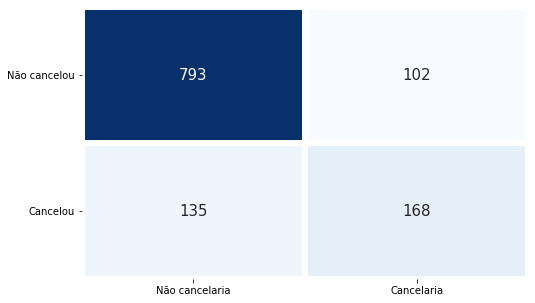

In [60]:
# REGRESSÃO LOGISTICA
lg = LogisticRegression(random_state = 42)
lg.fit(X_train, y_train)
y_pred = lg.predict(X_test)
y_prob = lg.predict_proba(X_test)[:,1]

# Metricas
print(classification_report(y_test, y_pred))
print("Acuracia", metrics.accuracy_score(y_test, y_pred))

# Matriz de confusão
lg_cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (8, 5))
sns.heatmap(lg_cm, cmap = 'Blues', annot = True, fmt = 'd', linewidths = 5, cbar = False, 
            annot_kws = {'fontsize': 15}, yticklabels = ['Não cancelou', 'Cancelou'], 
            xticklabels = ['Não cancelaria', 'Cancelaria'])
plt.yticks(rotation = 0)
plt.show()

              precision    recall  f1-score   support

           0       0.84      0.92      0.87       895
           1       0.65      0.47      0.55       303

    accuracy                           0.80      1198
   macro avg       0.74      0.69      0.71      1198
weighted avg       0.79      0.80      0.79      1198

Acuracia 0.8030050083472454


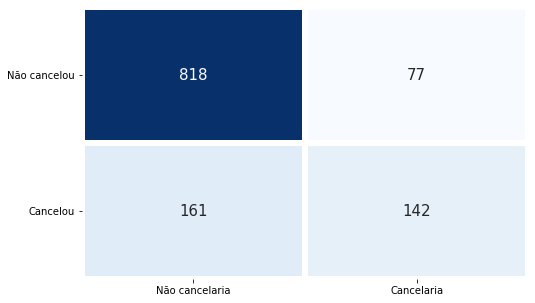

In [62]:
# Floresta aletória

rf = RandomForestClassifier(random_state = 22, max_depth = 5)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
y_prob = rf.predict_proba(X_test)[:,1]

# Metricas
print(classification_report(y_test, y_pred))
print("Acuracia", metrics.accuracy_score(y_test, y_pred))

plt.figure(figsize = (8, 5))
sns.heatmap(rf_cm, cmap = 'Blues', annot = True, fmt = 'd', linewidths = 5, cbar = False, 
            annot_kws = {'fontsize': 15}, yticklabels = ['Não cancelou', 'Cancelou'], 
            xticklabels = ['Não cancelaria', 'Cancelaria'])
plt.yticks(rotation = 0)
plt.show()